<a href="https://colab.research.google.com/github/yoonseong00/colab/blob/main/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<ipython-input-1-cd64d2aa3f2e>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 1. Load Data

In [28]:
train_df = pd.read_csv("/content/drive/MyDrive/hose_prices_folder/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/hose_prices_folder/test.csv")

In [29]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
# set index
train_df.set_index('Id', inplace=True)
test_df.set_index('Id', inplace=True)
len_train_df = len(train_df)
len_test_df = len(test_df)

# 2. Feature Selection - Variables of Corrleation >= 0.3

* **고려해야 할 변수가 많을 땐** 각 **독립변수와 종속변수 간의 상관관계**를 검토해보는 것이 좋다.
* 모든 변수를 사용하는 것도 좋지만 그 중 **좀더 의미 있는 변수만을 골라내어 모델을 구축하는 것이 모델의 예측 정확도를 높이는 방법**이다.
* corr()함수를 통해 dataframe내의 모든 변수간의 상관관계를 그린 후 상관관계가 0.3이상인 변수만 heatmap으로 출력하였다.



In [31]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>=0.3]
top_corr_features

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0.5, 0, 'LotFrontage'),
  Text(1.5, 0, 'OverallQual'),
  Text(2.5, 0, 'YearBuilt'),
  Text(3.5, 0, 'YearRemodAdd'),
  Text(4.5, 0, 'MasVnrArea'),
  Text(5.5, 0, 'BsmtFinSF1'),
  Text(6.5, 0, 'TotalBsmtSF'),
  Text(7.5, 0, '1stFlrSF'),
  Text(8.5, 0, '2ndFlrSF'),
  Text(9.5, 0, 'GrLivArea'),
  Text(10.5, 0, 'FullBath'),
  Text(11.5, 0, 'TotRmsAbvGrd'),
  Text(12.5, 0, 'Fireplaces'),
  Text(13.5, 0, 'GarageYrBlt'),
  Text(14.5, 0, 'GarageCars'),
  Text(15.5, 0, 'GarageArea'),
  Text(16.5, 0, 'WoodDeckSF'),
  Text(17.5, 0, 'OpenPorchSF'),
  Text(18.5, 0, 'SalePrice')])

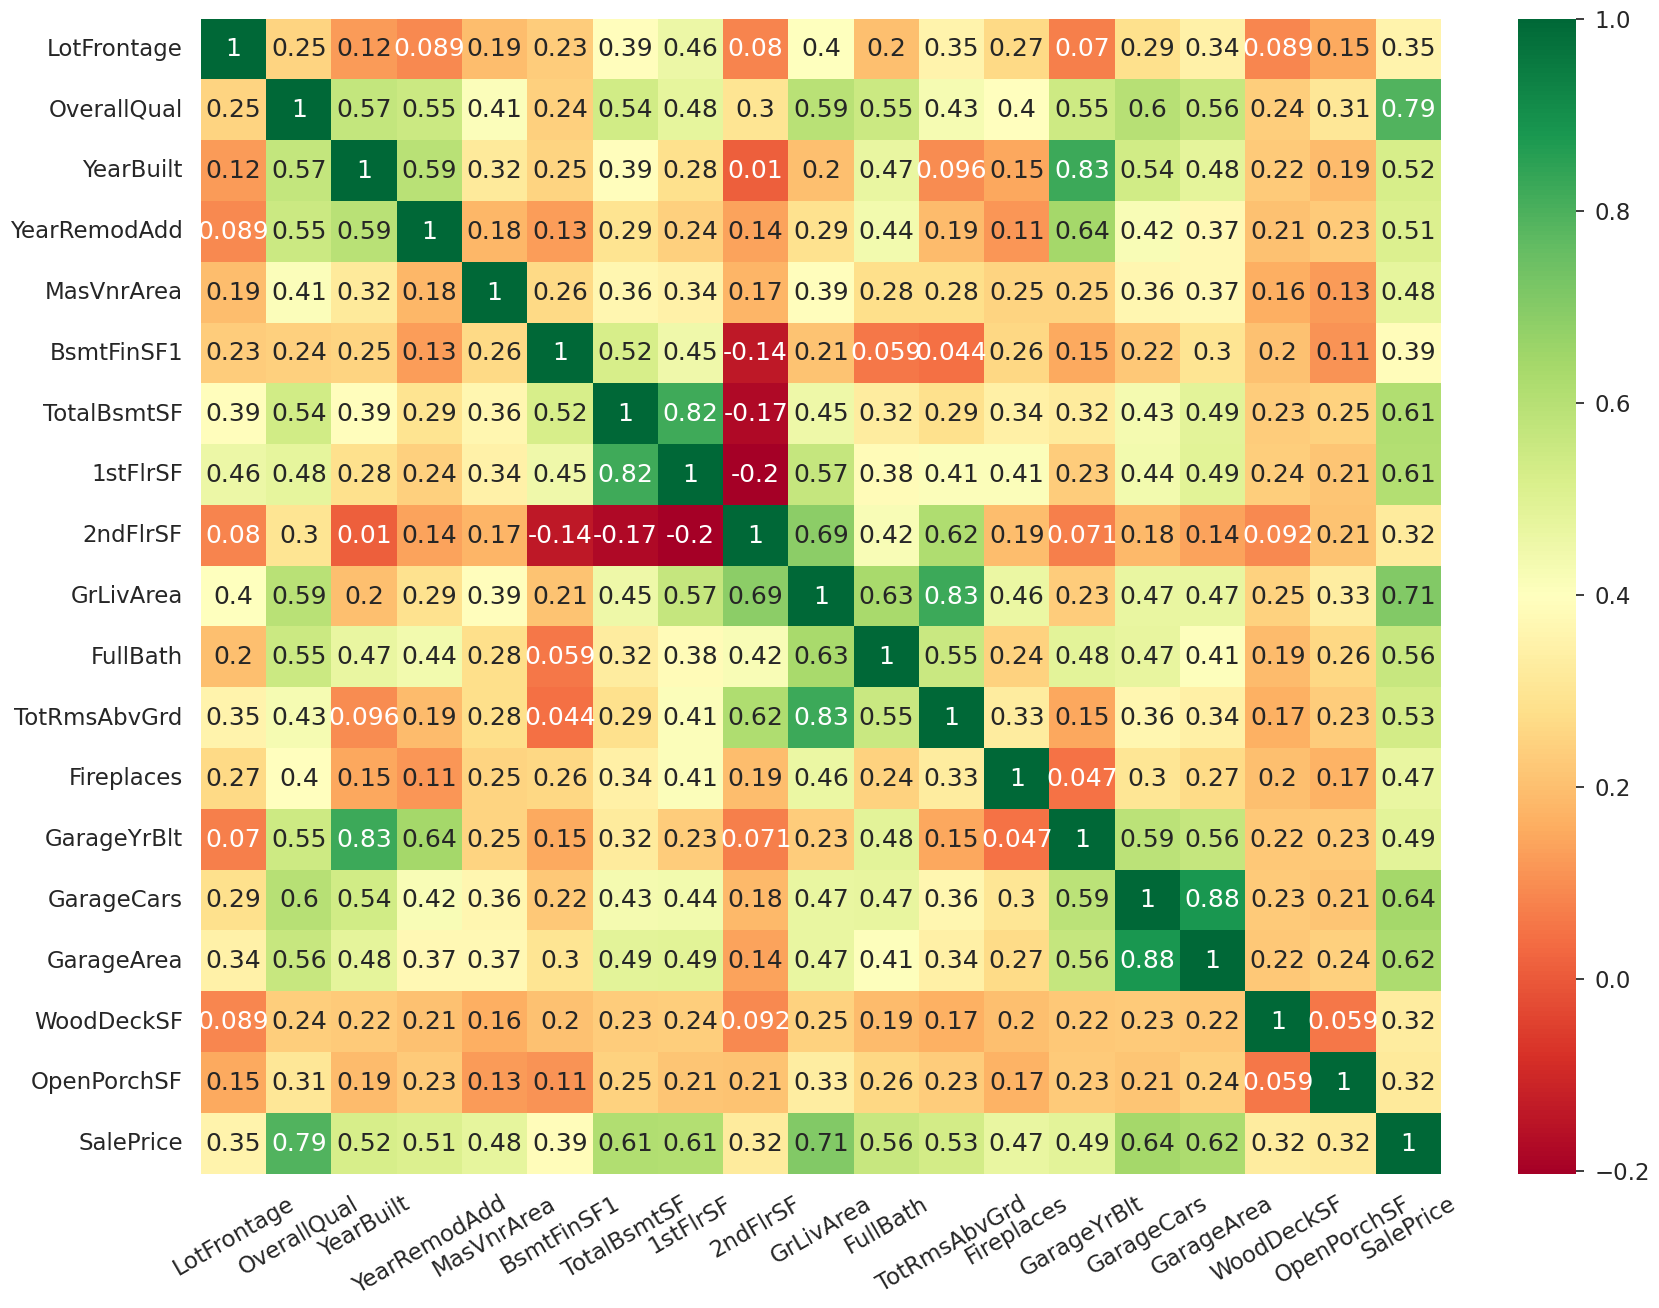

In [40]:
# heatmap
plt.figure(figsize=(20,15))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.xticks(rotation=30)

In [41]:
# split y_label
train_y_label = train_df['SalePrice'] 	# target 값을 미리 분리하였음.
train_df.drop(['SalePrice'], axis=1, inplace=True)

# 3. Concat train & test set

In [42]:
# concat train & test
boston_df = pd.concat((train_df, test_df), axis=0)
boston_df_index = boston_df.index

In [43]:
print('Length of Boston Dataset : ',len(boston_df))
boston_df.head()

Length of Boston Dataset :  2919


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


- train과 test 셋에 동일한 feature engineering을 적용해주기 위해 우선 두개의 데이터 셋을 하나로 합쳐주었다.
- 합쳐주니 2,919개로 데이터가 늘었다.

# 4. Check NaN ratio and Remove null ratio >= 0.5

- 데이터를 처리할 때 항상 Null값을 어떻게 처리할지 고민해야 한다. 추후 모델에 입력되는 input값에는 절대 어떠한 Null 값이 있어서는 안되며 있더라도 에러가 발생하기 때문에 미리 꼭 처리해주어야 한다.
- 우선 각 칼럼별로 **Null값 비율이 50%이상인 칼럼을 찾아 해당 칼럼을 제거**해주었다.
- 보통 null값 처리를 위해 평균, 최대값, 최소값 등으로 대체하곤 하는데 위와 같이 대부분의 칼럼이 Null인 데이터는 차라리 없애주는 것이 좋다.